# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you pulled lyrics data on two artists. In this assignment we explore this data set and a pull from the now-defunct Twitter API for the artists Cher and Robyn.  If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Canvas. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [31]:
import sys
!{sys.executable} -m pip install emoji

In [32]:
import nltk
# only need to run this once per environment
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bobbymarriott/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")

In [42]:
# Add any additional import statements you need here
import json
import matplotlib.pyplot as plt

In [43]:
# change `data_location` to the location of the folder on your machine.
data_location = "/Users/bobbymarriott/Downloads/M1 Results"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter"
lyrics_folder = "lyrics"

# build the full paths
import os
twitter_path = os.path.join(data_location, twitter_folder)
lyrics_path  = os.path.join(data_location, lyrics_folder)

print("Twitter files:", os.listdir(twitter_path))
print("Lyrics artists:", os.listdir(lyrics_path))

Twitter files: ['.DS_Store', 'cher_followers_data.txt', 'robynkonichiwa_followers_data.txt', 'cher_followers.txt', 'robynkonichiwa_followers.txt']
Lyrics artists: ['robyn', 'cher']


In [44]:
def descriptive_stats(tokens, num_common=5, verbose=True):
    """
    Given a list of tokens, print number of tokens, number of unique tokens,
    number of characters, lexical diversity, and the num_common most common tokens.
    Return [N, V, TTR, chars].
    """
    # 1) total number of tokens
    N = len(tokens)

    # 2) unique tokens
    V = len(set(tokens))

    # 3) lexical diversity
    TTR = V / N if N > 0 else 0.0

    # 4) total characters (sum of token lengths)
    chars = sum(len(t) for t in tokens)

    if verbose:
        print(f"There are {N} tokens in the data.")
        print(f"There are {V} unique tokens in the data.")
        print(f"There are {chars} characters in the data.")
        print(f"The lexical diversity is {TTR:.3f} in the data.")

        # 5) print the most common tokens
        most_common = Counter(tokens).most_common(num_common)
        print(f"\nThe {num_common} most common tokens are:")
        for word, count in most_common:
            print(f"  {word}: {count}")

    return [N, V, TTR, chars]

def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    # Fill in the correct values here. 
    num_tokens = 0
    num_unique_tokens = 0
    lexical_diversity = 0.0
    num_characters = 0
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])
    

In [45]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.

The 5 most common tokens are:
  text: 3
  here: 2
  example: 2
  is: 1
  some: 1


Q: Why is it beneficial to use assertion statements in your code? 

A: These statements allow you to debug easier by catching logic errors early.

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [46]:
# Read in the lyrics data

# build the full path to your lyrics folder
lyrics_path = os.path.join(data_location, lyrics_folder)

# we'll store as: lyrics_data[artist] = [song1_text, song2_text, …]
lyrics_data = {}

for artist in os.listdir(lyrics_path):
    artist_dir = os.path.join(lyrics_path, artist)
    if not os.path.isdir(artist_dir):
        continue

    song_texts = []
    for fname in os.listdir(artist_dir):
        if fname.endswith(".txt"):
            with open(os.path.join(artist_dir, fname), encoding="utf-8") as f:
                song_texts.append(f.read())
    lyrics_data[artist] = song_texts

# sanity check
for artist, songs in lyrics_data.items():
    print(f"{artist}: loaded {len(songs)} songs")

robyn: loaded 104 songs
cher: loaded 316 songs


In [49]:
twitter_path = os.path.join(data_location, twitter_folder)
fname = [f for f in os.listdir(twitter_path) if f.lower().startswith("cher_")][0]
path  = os.path.join(twitter_path, fname)

# 1) Print the first few raw lines so we can see the delimiter
print("--- RAW LINES ---")
with open(path, encoding="utf-8") as f:
    for _ in range(5):
        print(f.readline().rstrip())

# 2) Let Python sniff the delimiter
import csv
with open(path, encoding="utf-8") as f:
    sample = f.read(4096)
dialect = csv.Sniffer().sniff(sample, delimiters=[",", "\t", ";", "|"])
print("\nDetected delimiter:", repr(dialect.delimiter))

# 3) Try reading just the header row to get column names
import pandas as pd
df_hdr = pd.read_csv(path, sep=dialect.delimiter, engine="python", nrows=0)
print("\nColumns:", df_hdr.columns.tolist())

--- RAW LINES ---
screen_name	name	id	location	followers_count	friends_count	description
hsmcnp	Country Girl	35152213		1302	1014
horrormomy	Jeny	742153090850164742	Earth	81	514	𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜
anju79990584	anju	1496463006451974150		13	140	163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡
gallionjenna	J	3366479914		752	556	csu

Detected delimiter: '\t'

Columns: ['screen_name', 'name', 'id', 'location', 'followers_count', 'friends_count', 'description']


In [51]:
twitter_path = os.path.join(data_location, twitter_folder)
twitter_desc = {}
for fname in os.listdir(twitter_path):
    if not fname.endswith("_followers_data.txt"):
        continue

    # determine artist
    lower = fname.lower()
    artist = "Cher" if lower.startswith("cher_") else "Robyn"

    fullpath = os.path.join(twitter_path, fname)
    df = pd.read_csv(
        fullpath,
        sep="\t",
        engine="python",
        on_bad_lines="skip"
    )

    # Now this will always exist
    twitter_desc[artist] = df["description"].fillna("").tolist()
    print(f"{artist}: loaded {len(twitter_desc[artist])} descriptions")

# Final sanity check
for artist, descs in twitter_desc.items():
    print(f"→ {artist} has {len(descs)} description records")

Cher: loaded 3918103 descriptions
Robyn: loaded 351729 descriptions
→ Cher has 3918103 description records
→ Robyn has 351729 description records


## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [52]:
sw = set(stopwords.words("english"))
punctuation = set(punctuation)   # speeds up “in” tests

In [53]:
# create your clean twitter data here
# Build a dict of cleaned tokens for each artist’s Twitter descriptions
twitter_clean = {}

for artist, descs in twitter_desc.items():
    toks = []
    for desc in descs:
        for w in desc.split():
            w2 = w.lower().strip("".join(punctuation))
            if w2 and w2 not in sw:
                toks.append(w2)
    twitter_clean[artist] = toks

# Sanity check
for artist, toks in twitter_clean.items():
    print(f"{artist}: {len(toks)} cleaned tokens")

Cher: 15209428 cleaned tokens
Robyn: 1457061 cleaned tokens


In [54]:
# create your clean lyrics data here
# Build a dict of cleaned tokens for each artist’s lyrics
lyrics_clean = {}

for artist, songs in lyrics_data.items():
    toks = []
    for song in songs:
        for w in song.split():
            w2 = w.lower().strip("".join(punctuation))
            if w2 and w2 not in sw:
                toks.append(w2)
    lyrics_clean[artist] = toks

# Sanity check
for artist, toks in lyrics_clean.items():
    print(f"{artist}: {len(toks)} cleaned tokens")

robyn: 14127 cleaned tokens
cher: 33467 cleaned tokens


## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [57]:
print(lyrics_clean.keys())

dict_keys(['robyn', 'cher'])


In [59]:
# calls to descriptive_stats here
descriptive_stats( lyrics_clean['cher'] )
descriptive_stats( lyrics_clean['robyn'] )
descriptive_stats( twitter_clean['Cher'] )
descriptive_stats( twitter_clean['Robyn'] )

There are 33467 tokens in the data.
There are 3712 unique tokens in the data.
There are 164699 characters in the data.
The lexical diversity is 0.111 in the data.

The 5 most common tokens are:
  love: 1004
  know: 486
  time: 319
  baby: 319
  see: 308
There are 14127 tokens in the data.
There are 2141 unique tokens in the data.
There are 70442 characters in the data.
The lexical diversity is 0.152 in the data.

The 5 most common tokens are:
  know: 308
  love: 275
  got: 251
  like: 232
  baby: 222
There are 15209428 tokens in the data.
There are 1563522 unique tokens in the data.
There are 92265095 characters in the data.
The lexical diversity is 0.103 in the data.

The 5 most common tokens are:
  love: 210441
  life: 120661
  music: 86575
  de: 71649
  follow: 61401
There are 1457061 tokens in the data.
There are 254155 unique tokens in the data.
There are 9100474 characters in the data.
The lexical diversity is 0.174 in the data.

The 5 most common tokens are:
  music: 14922
  lov

[1457061, 254155, 0.17442989689518834, 9100474]

Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: The top-5 list would probably consist of words such as 'the', 'and', 'to', etc. This would get in the way of the more interesting and specific words. 

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: Since Cher has a longer career and more diverse music I believed that she would have a higher type-token ratio. However, Robyn Lyrics (TTR 0.152 > 0.111) and Tweets (0.174 > 0.103) do not reflect that. 



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [60]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [61]:
for artist, descs in twitter_desc.items():
    counts = Counter()
    for desc in descs:
        for ch in desc:
            if emoji.is_emoji(ch):
                counts[ch] += 1

    print(f"\nTop 10 emojis for {artist}:")
    for em, cnt in counts.most_common(10):
        print(f"  {em}  {cnt}")


Top 10 emojis for Cher:
  ❤  77560
  🌈  46613
  ♥  33422
  🏳  32759
  ✨  28967
  💙  20974
  🏻  20532
  🌊  19866
  ✌  16422
  💜  16256

Top 10 emojis for Robyn:
  ❤  4663
  🌈  4581
  🏳  3448
  ♥  3050
  ✨  2177
  🏻  1473
  ✌  1176
  🏼  1113
  ♀  819
  💙  788


### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [62]:
HASHTAG_RE = re.compile(r"#\w+")

for artist, descs in twitter_desc.items():
    counts = Counter()
    for desc in descs:
        for tag in HASHTAG_RE.findall(desc):
            counts[tag.lower()] += 1

    print(f"\nTop 10 hashtags for {artist}:")
    for tag, cnt in counts.most_common(10):
        print(f"  {tag}  {cnt}")


Top 10 hashtags for Cher:
  #resist  11419
  #blm  10258
  #blacklivesmatter  7989
  #theresistance  3439
  #fbr  3356
  #resistance  3002
  #1  2585
  #voteblue  2255
  #lgbtq  2040
  #music  1576

Top 10 hashtags for Robyn:
  #blacklivesmatter  592
  #blm  356
  #music  302
  #1  197
  #teamfollowback  135
  #edm  110
  #lgbtq  88
  #resist  84
  #travel  71
  #love  71


### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [64]:
def words(text):
    """Peter Norvig’s simple word tokenizer."""
    return re.findall(r"\w+", text.lower())

In [66]:
for artist, songs in lyrics_data.items():
    counts = Counter()
    for full_text in songs:
        title = full_text.splitlines()[0]
        # inline tokenization
        for w in re.findall(r"\w+", title.lower()):
            w = w.strip("".join(punctuation))
            if w and w not in sw:
                counts[w] += 1

    print(f"\nTop 5 title‐words for {artist}:")
    for w, cnt in counts.most_common(5):
        print(f"  {w}  {cnt}")


Top 5 title‐words for robyn:
  love  6
  u  4
  hang  3
  tell  3
  girl  3

Top 5 title‐words for cher:
  love  38
  man  15
  song  11
  come  7
  one  7


### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


artist
Artist 1    Axes(0.125,0.11;0.775x0.77)
Artist 2    Axes(0.125,0.11;0.775x0.77)
Name: length, dtype: object

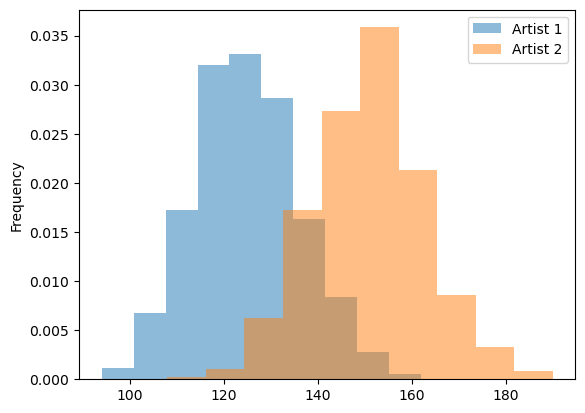

In [67]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: It matches any one or more whitespace character in a row. Any contiguous block of whitespace can be treated as a single delimeter.


In [68]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

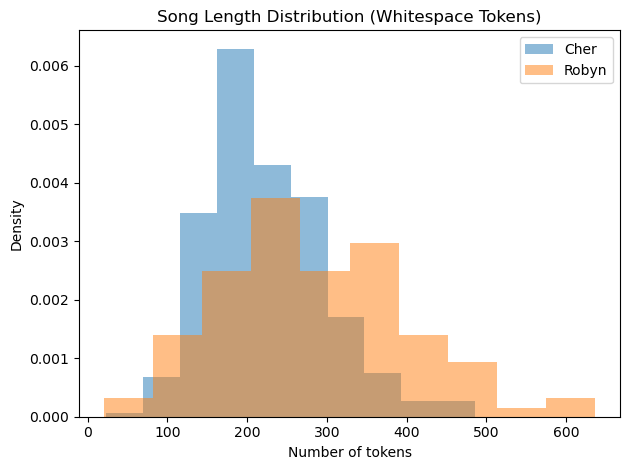

In [70]:
# Build a DataFrame of token counts per song using the whitespace tokenizer
rows = []
for artist, songs in lyrics_data.items():
    for song_text in songs:
        num_tokens = len(tokenize_lyrics(song_text))
        rows.append({"artist": artist.capitalize(), "length": num_tokens})

df_lengths = pd.DataFrame(rows)

# Plot overlaid density histograms by artist
ax = None
for artist, group in df_lengths.groupby("artist"):
    ax = group["length"].plot(
        kind="hist",
        density=True,
        alpha=0.5,
        legend=True,
        label=artist,
        ax=ax
    )

plt.xlabel("Number of tokens")
plt.ylabel("Density")
plt.title("Song Length Distribution (Whitespace Tokens)")
plt.tight_layout()
plt.show()